## <center> AMBER Tutorial </center>
# <center> Interactive data analysis with pytraj/cpptraj and Jupyter notebook </center>
### <center> By Hai Nguyen (BSD 2-clause) </center>

## What is Jupyter notebook?

Direct introduction and figure from [Jupyter notebook website](http://jupyter.org/):

"The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more."

<img src="images/jupyterpreview.png", width=500>



## What is pytraj?

**pytraj** is a Python package binding to the popular **cpptraj** program. pytraj is written do extend the flexibility of cpptraj and to expose cpptraj's functionality to Python's ecosystem, such as numpy, pandas, matplotlib, ...

## What can you learn from this tutorial

- Use Jupyter notebook for interactive  data exploration

- Use pytraj to perform basis analysis such loading files to memory and do computing RMSD

- Use matplotlib and pandas for analyzing output from pytraj


## Requirement

- [AmberTools >= 16](http://ambermd.org/#AmberTools)
- If you allow AMBER to install Python distribution from Miniconda, you have most needed packages (except pandas) for this tutorial.
- If not, you need to install (either using `pip` or `conda`)
    - matplotlib
    - jupyter notebook
- Install [pandas](http://pandas.pydata.org/): 
    ```bash
     amber.conda install pandas
    ```
- You know how to use Linux command line. If not, please check [basic AMBER tutorial](http://ambermd.org/tutorials/basic/tutorial0/)

## Download required trajectories, topology

All files used in this tutorial, including this notebook, is here: [tutorial_files.zip](tutorial_files.zip)

- Download it, then

```bash
mkdir tutorial
cd tutorial
unzip ../tutorial_files.zip
```

## Start notebook

```bash
$ amber.jupyter notebook
(or jupyter notebook if you did not allow AMBER to install Miniconda)
```

- You should expect to see a blank directory (or with a list of files)

![](images/jupyter_open.png)

- Choose **New --> Python 2** (or Python 3, depending on which version you're using)

- You should expect to see
![](images/jupyter_new.png)


- How to follow this tutorial? Copy and paste each command in this tutorial to the notebook, hit "**Shift-Enter**" to run and to create new Cell. Check **Tips** in the end of this tutorial for useful commands.

- If you want to use the notebook remotely (run it in your remote cluster and view it in your desktop), please check [remote notebook tutorial](http://amber-md.github.io/pytraj/latest/tutorials/remote_jupyter_notebook)

- **Note**: This tutorial is written in the Jupyter notebook, so you can [download](./notebook.ipynb) and run it too.

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{border: 1px 
black solid ! important;color:black !important;}

## Load trajectory to memory

In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # avoid warning message to make the notebook nicer

import pytraj as pt

traj = pt.load('data/trpzip2.gb.nc',
               top='data/trpzip2.ff10.mbondi.parm7')

## Get some basic information about the trajectory

In [3]:
print(traj)

pytraj.Trajectory, 1201 frames: 
Size: 0.005906 (GB)
<Topology: 220 atoms, 13 residues, 1 mols, non-PBC>
           


## Computing RMSD, using 1st frame as reference

In this case we are computing mass-weighted RMSD, using all non-hydrogen atoms in residues 1 to 13

In [4]:
data_rmsd_first = pt.rmsd(traj, ref=0, 
                          mask=":1-13&!@H*")

print(data_rmsd_first)

[2.30050392e-07 7.92393865e-01 9.72257525e-01 ... 2.51047183e+00
 2.44805673e+00 2.33894156e+00]


### Using matplotlib to plot

Text(0, 0.5, 'RMSD (Angstrom)')

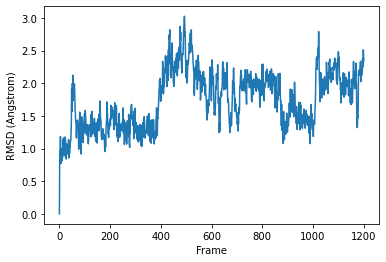

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(data_rmsd_first)
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')

### Loading reference structure

In this case, we are loading the NMR structure for trpzip2

In [6]:
# we can reuse loaded topology from `traj`
ref = pt.load('data/trpzip2.1LE1.1.rst7', 
              top=traj.top)
print(ref)

pytraj.Trajectory, 1 frames: 
Size: 0.000005 (GB)
<Topology: 220 atoms, 13 residues, 1 mols, non-PBC>
           


## Computing RMSD to a Reference

In [7]:
data_rmsd_ref = pt.rmsd(traj, ref=ref,
                        mask=":1-13&!@H*")
print(data_rmsd_ref)

[1.28171363 0.98184973 0.95976186 ... 2.1723379  2.21177339 2.10760399]


## Plotting two RMSDs

We can plot rmsd to 1st frame (previously calculated) and rmsd to reference (NMR)

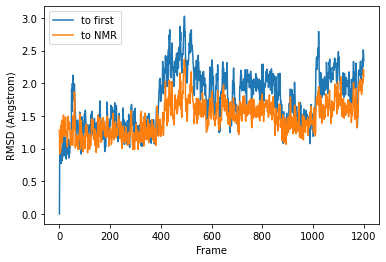

In [8]:
plt.plot(data_rmsd_first, label='to first')
plt.plot(data_rmsd_ref, label='to NMR')
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')
plt.legend()

## Computing pairwise RMSD for specific snapshots

In [9]:
# compute pairwise RMSD for first 50 snapshots and skip every 10 frames
mat = pt.pairwise_rmsd(traj, mask=":1-13&!@H*",
            frame_indices=range(0, 500, 10))
print(mat)

[[0.         0.81742334 0.88945633 ... 2.525405   2.447465   2.8338962 ]
 [0.81742334 0.         0.92505556 ... 2.4251018  2.3271756  2.8215697 ]
 [0.88945633 0.92505556 0.         ... 2.3470259  2.2649097  2.6031551 ]
 ...
 [2.525405   2.4251018  2.3470259  ... 0.         1.0093889  1.4123441 ]
 [2.447465   2.3271756  2.2649097  ... 1.0093889  0.         1.3965123 ]
 [2.8338962  2.8215697  2.6031551  ... 1.4123441  1.3965123  0.        ]]


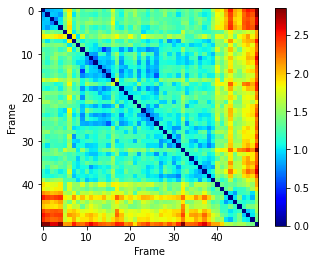

In [10]:
plt.imshow(mat, cmap='jet')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar()

## Computing dihedral angles

In this case, we are computing phi and psi angle for residues 2 to 12. We tell pytraj to convert raw data to pandas's DataFrame
to better visualization in notebook

In [11]:
phipsi = pt.multidihedral(traj, resrange='1-12', dihedral_types="phi psi", dtype='dataframe')

### Pretty display data

In this case, we only display a part of the data

In [12]:
phipsi[['phi_4', 'psi_4', 'phi_5', 'psi_5']].head(5)

,phi_4,psi_4,phi_5,psi_5
0,-75.439203,136.828950,-166.265268,142.963215
1,-83.644329,130.036725,-149.613451,140.469441
2,-97.466250,138.200851,-152.872485,122.812971
3,-90.913898,115.232213,-126.890970,132.339599
4,-94.040970,131.921428,-140.411407,151.705385


### Getting some basic info

In [13]:
phipsi[['phi_4', 'psi_4', 'phi_5', 'psi_5']].describe()

,phi_4,psi_4,phi_5,psi_5
count,1201.000000,1201.000000,1201.000000,1201.000000
mean,-84.227620,131.166893,-143.707816,105.065698
std,16.317879,12.427970,13.340660,39.313901
min,-147.577326,80.866604,-176.154622,-179.166655
25%,-94.353636,123.182218,-152.771024,71.362192
50%,-82.585343,131.887478,-145.219714,115.641876
75%,-73.350432,140.019820,-136.516230,134.998512
max,-37.436428,166.331044,-64.705252,176.879019


### Plotting dihedral

In this case, we are plotting Psi dihedral for residue 4 (TRP)

Text(0, 0.5, 'Phi4')

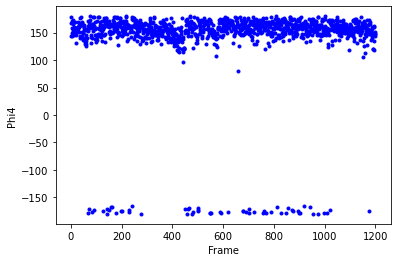

In [14]:
plt.plot(phipsi['psi_8'], '-bo', markersize=3, linewidth=0)
plt.xlabel('Frame')
plt.ylabel('Phi4')

# Get some information about the structure

In [15]:
top = traj.top

for residue in top.residues:
    # Note: In python, 0-based index is used.
    # For example: SER0 should be first residue
    print(residue)

<SER0, 13 atoms>
<TRP1, 24 atoms>
<THR2, 14 atoms>
<TRP3, 24 atoms>
<GLU4, 15 atoms>
<ASN5, 14 atoms>
<GLY6, 7 atoms>
<LYS7, 22 atoms>
<TRP8, 24 atoms>
<THR9, 14 atoms>
<TRP10, 24 atoms>
<LYS11, 22 atoms>
<NHE12, 3 atoms>


In [16]:
list(traj.top.atoms)[:10]

[Atom(name=N, type=N3, atomic_number=7, index=0, resid=0),
 Atom(name=H1, type=H, atomic_number=1, index=1, resid=0),
 Atom(name=H2, type=H, atomic_number=1, index=2, resid=0),
 Atom(name=H3, type=H, atomic_number=1, index=3, resid=0),
 Atom(name=CA, type=CX, atomic_number=6, index=4, resid=0),
 Atom(name=HA, type=HP, atomic_number=1, index=5, resid=0),
 Atom(name=CB, type=CT, atomic_number=6, index=6, resid=0),
 Atom(name=HB2, type=H1, atomic_number=1, index=7, resid=0),
 Atom(name=HB3, type=H1, atomic_number=1, index=8, resid=0),
 Atom(name=OG, type=OH, atomic_number=8, index=9, resid=0)]

## Tips

- Run bash command: Use !

In [17]:
! echo Hello

Hello


- How to run this notebook?
    
    - Run all commands: **Cell -> Run All**
    - Run each Cell: **Ctrl-Enter**
    - Run each Cell and jump to next Cell: **Shift-Enter**
- How to save all commands to Python script: Choose **File -> Download as -> Python (.py)**
- How to save figures in this notebook: Right click and choose **Save image as** (or similiar command)
- More info? Choose **Help -> Keyboard Shortcuts**

## See also

If you would like to learn more about ``pytraj``, please see unofficial AMBER tutorials for pytraj in [pytraj website](http://amber-md.github.io/pytraj/latest/tutorials/index.html)

In [18]:
#!wget http://ambermd.org/tutorials/basic/tutorial3/files/production.tar.gz

--2022-10-25 16:30:36--  http://ambermd.org/tutorials/basic/tutorial3/files/production.tar.gz
Résolution de ambermd.org (ambermd.org)… 128.6.241.202
Connexion à ambermd.org (ambermd.org)|128.6.241.202|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 135482912 (129M) [application/x-gzip]
Enregistre : ‘production.tar.gz.3’

production.tar.gz.3 100%[===================>] 129,21M  14,3MB/s    ds 8,4s    

2022-10-25 16:30:44 (15,4 MB/s) - ‘production.tar.gz.3’ enregistré [135482912/135482912]



In [19]:
#!wget http://ambermd.org/tutorials/basic/tutorial3/files/TC5b.prmtop

--2022-10-25 16:30:44--  http://ambermd.org/tutorials/basic/tutorial3/files/TC5b.prmtop
Résolution de ambermd.org (ambermd.org)… 128.6.241.202
Connexion à ambermd.org (ambermd.org)|128.6.241.202|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 131123 (128K)
Enregistre : ‘TC5b.prmtop’

TC5b.prmtop         100%[===================>] 128,05K   509KB/s    ds 0,3s    

2022-10-25 16:30:45 (509 KB/s) - ‘TC5b.prmtop’ enregistré [131123/131123]



In [20]:
!tar -xf ./production.tar.gz
!mv TC5b.prmtop production/

In [21]:
#!wget http://ambermd.org/tutorials/basic/tutorial3/files/lowest_energy_struct.pdb.2455

--2022-10-25 16:30:46--  http://ambermd.org/tutorials/basic/tutorial3/files/lowest_energy_struct.pdb.2455
Résolution de ambermd.org (ambermd.org)… 128.6.241.202
Connexion à ambermd.org (ambermd.org)|128.6.241.202|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 20368 (20K) [application/vnd.palm]
Enregistre : ‘lowest_energy_struct.pdb.2455’

lowest_energy_struc 100%[===================>]  19,89K  --.-KB/s    ds 0,08s   

2022-10-25 16:30:47 (239 KB/s) - ‘lowest_energy_struct.pdb.2455’ enregistré [20368/20368]



In [22]:
!mv lowest_energy_struct.pdb.2455 production/

In [23]:
!ls production

equil10.mdcrd.gz  equil3.rst	   equil7.out
equil10.out	  equil4.mdcrd.gz  equil7.rst
equil10.rst	  equil4.out	   equil8.mdcrd.gz
equil1.mdcrd.gz   equil4.rst	   equil8.out
equil1.out	  equil5.mdcrd.gz  equil8.rst
equil1.rst	  equil5.out	   equil9.mdcrd.gz
equil2.mdcrd.gz   equil5.rst	   equil9.out
equil2.out	  equil6.mdcrd.gz  equil9.rst
equil2.rst	  equil6.out	   lowest_energy_struct.pdb.2455
equil3.mdcrd.gz   equil6.rst	   TC5b.prmtop
equil3.out	  equil7.mdcrd.gz


In [24]:
import pytraj as pt
traj = pt.load('production/equil*.mdcrd.gz', top='production/TC5b.prmtop')
traj

pytraj.Trajectory, 50000 frames: 
Size: 0.339746 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [25]:
import nglview as nv

view = nv.show_pytraj(traj)
view

NGLWidget(max_frame=49999)

In [26]:
view.representations = []
view.parameters = {'theme': 'dark'}
view.add_representation('licorice', selection='not hydrogen')
view.add_representation('cartoon')

In [27]:
view.frame = 2000

In [28]:
from IPython.display import Image
#Image('nglview_trpcage_amber_tutorial_3.png', width=600)

In [29]:
lowest_energy_pdb = pt.load('production/lowest_energy_struct.pdb.2455')
lowest_energy_pdb

pytraj.Trajectory, 1 frames: 
Size: 0.000007 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [30]:
rmsd_to_lowest_pdb = pt.rmsd(traj, ref=lowest_energy_pdb, mask='@N,CA,C')
rmsd_to_lowest_pdb

array([5.27339494, 5.14608589, 4.98715608, ..., 3.73567383, 3.52249127,
       3.46483843])

Text(0, 0.5, 'RMSD (angstrom)')

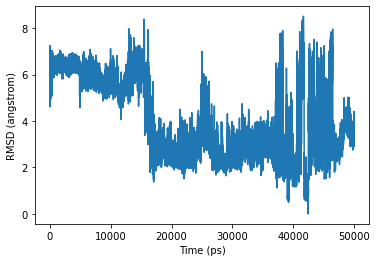

In [31]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(rmsd_to_lowest_pdb)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (angstrom)')
